<html>
    <center>
        <h1><u>GRIP - The Sparks Foundation</u></h1><br>
    </center>
    <h3>Data Science & Business Analytics Internship</h3>
    <h3>Linear Regresssion with Python Scikit Learn - Predcition using Supervised ML</h3>
    <h3>Author: Devansh Gupta</h3>
    <h4>Task 1 - Predict the percentage scored by a student based on the no. of study hours.</h4>
</html>

## Importing Libriaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Reading the csv file and checking its head

In [2]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Getting insights from the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting the distribution of scores

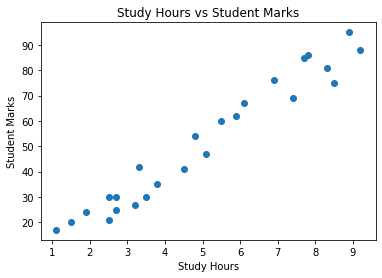

In [5]:
x = data.Hours
y = data.Scores

plt.scatter(x,y)
plt.xlabel('Study Hours')
plt.ylabel('Student Marks')
plt.title('Study Hours vs Student Marks')
plt.show()

## Preparing the data

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
x = data.drop('Scores', axis='columns')
y = data.drop('Hours', axis='columns')
print(x.shape, y.shape)

(25, 1) (25, 1)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(X_test.shape)

(20, 1)
(20, 1)
(5, 1)
(5, 1)


## Training the Algorithm

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

print('Trained the algorithm')

Trained the algorithm


## Plotting the regression line

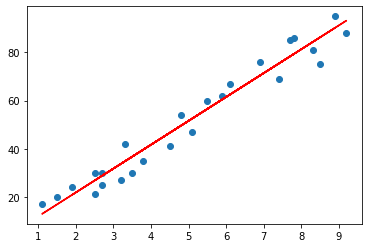

In [11]:
m = lr.coef_
c = lr.intercept_

line = m * X_train + c

plt.scatter(x, y)
plt.plot(X_train, line, color='r')
plt.show()

### Testing our own Data

In [12]:
hours = 9.25
print('Predcited score for 9.25 hours is: ', lr.predict([[hours]])[0][0].round(2))

Predcited score for 9.25 hours is:  93.69


## Comparing Actual vs Predicted

In [13]:
y_pred = lr.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [14]:
df = pd.DataFrame(np.c_[Y_test, y_pred], columns=['Actual', 'Predicted'])
df

,Actual,Predicted
0,20.0,16.884145
1,27.0,33.732261
2,69.0,75.357018
3,30.0,26.794801
4,62.0,60.491033


## Evaluating the model

In [15]:
from sklearn import metrics  
print('Mean Absolute Error is:', 
      metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error is: 4.18385989900298


In [16]:
print('Accuracy of the model is: ', lr.score(X_test, Y_test) * 100)

Accuracy of the model is:  94.54906892105355
